In [1]:
import pandas as pd

# Load the CSV file
file_path = 'hodinove-denni.csv'
energy_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
## show the amout of NaN
print(energy_data.isnull().sum())
energy_data


category            0
Denní průměr      759
Hodinová cena    1965
dtype: int64


,category,Denní průměr,Hodinová cena
0,Tue Jan 01 2019,297.20,NaN
1,Wed Jan 02 2019,979.67,NaN
2,Thu Jan 03 2019,1515.75,NaN
3,Fri Jan 04 2019,1366.19,NaN
4,Sat Jan 05 2019,1115.17,NaN
...,...,...,...
2751,Wed Jun 19 2024,NaN,3086.26
2752,Wed Jun 19 2024,NaN,5748.68
2753,Wed Jun 19 2024,NaN,3130.23
2754,Wed Jun 19 2024,NaN,2762.94


In [2]:
# Data Cleaning
# Convert 'category' to datetime
energy_data['category'] = pd.to_datetime(energy_data['category'], format='%a %b %d %Y')

# Rename columns for easier handling
energy_data.rename(columns={'category': 'Date', 'Denní průměr': 'Daily_Average_Price', 'Hodinová cena': 'Hourly_Price'}, inplace=True)

# Check for missing values and basic statistics
missing_values = energy_data.isna().sum()
basic_statistics = energy_data.describe()

missing_values, basic_statistics


(Date                      0
 Daily_Average_Price     759
 Hourly_Price           1965
 dtype: int64,
                                 Date  Daily_Average_Price  Hourly_Price
 count                           2756          1997.000000    791.000000
 mean   2022-06-22 10:36:24.034833152          2524.928543   1899.222554
 min              2019-01-01 00:00:00          -519.680000  -1985.880000
 25%              2020-11-19 18:00:00          1046.850000   1476.490000
 50%              2022-10-09 12:00:00          1723.860000   2040.140000
 75%              2024-05-22 00:00:00          2961.510000   2534.570000
 max              2024-06-19 00:00:00         17324.760000   5748.680000
 std                              NaN          2370.924565   1117.256700)

C:\Users\kzem\AppData\Local\Temp\ipykernel_26272\407617654.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  energy_data['Daily_Average_Price'].fillna(energy_data['Daily_Average_Price'].mean(), inplace=True)
C:\Users\kzem\AppData\Local\Temp\ipykernel_26272\407617654.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

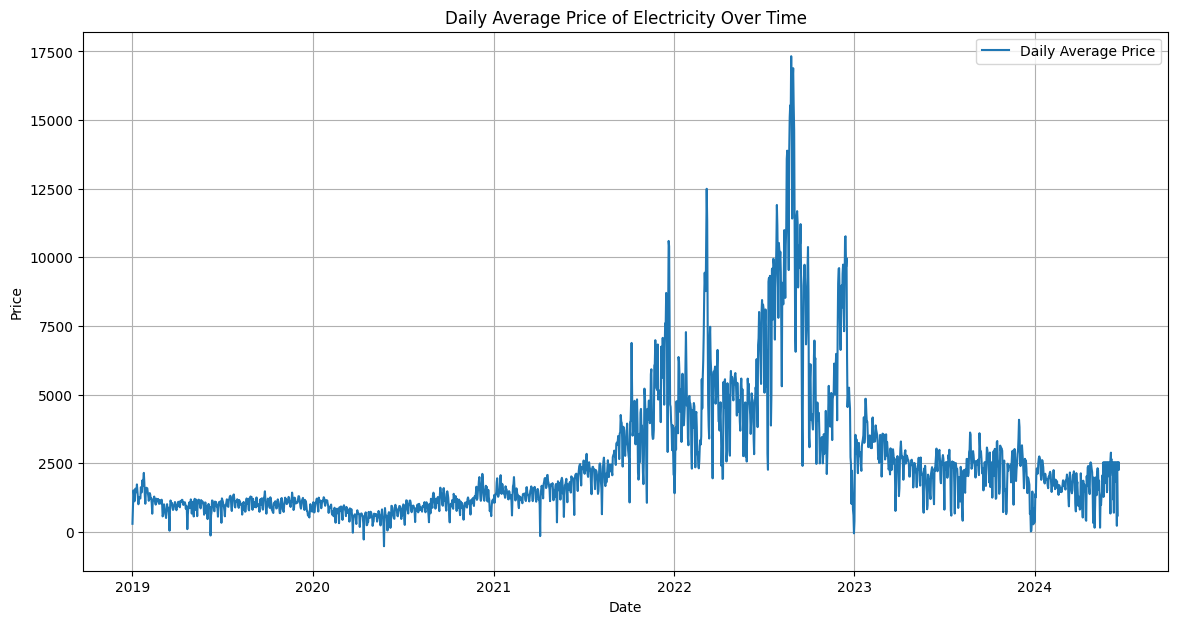

In [3]:
import matplotlib.pyplot as plt

# Handling missing values by filling with the mean of the respective column
energy_data['Daily_Average_Price'].fillna(energy_data['Daily_Average_Price'].mean(), inplace=True)
energy_data['Hourly_Price'].fillna(energy_data['Hourly_Price'].mean(), inplace=True)

# Visualize the Daily Average Price over time
plt.figure(figsize=(14, 7))
plt.plot(energy_data['Date'], energy_data['Daily_Average_Price'], label='Daily Average Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Average Price of Electricity Over Time')
plt.legend()
plt.grid(True)
plt.show()


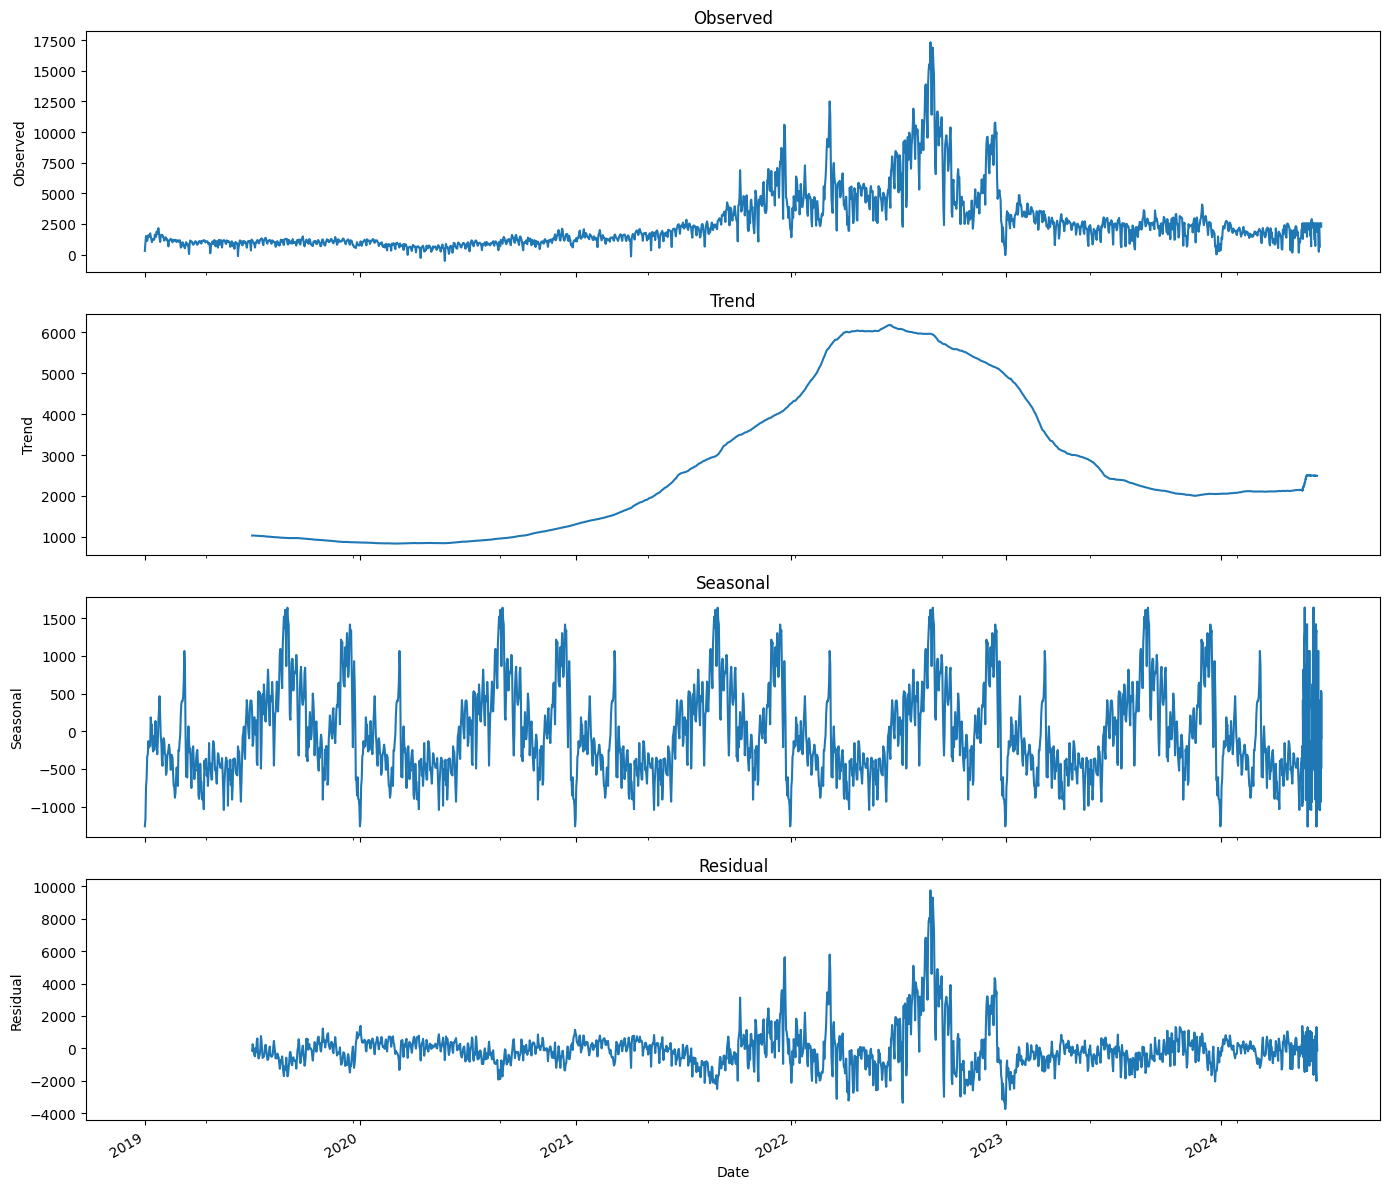

In [4]:
## More information about the data
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the date column as the index for time series analysis
energy_data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(energy_data['Daily_Average_Price'], model='additive', period=365)

# Plot the decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
ax1.set_title('Observed')

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
ax2.set_title('Trend')

decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
ax3.set_title('Seasonal')

decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
ax4.set_title('Residual')
ax4.set_xlabel('Date')

plt.tight_layout()
plt.show()


In [5]:
# Load the electricity consumption data from the provided Excel file
consumption_file_path = 'Gamma_export-elektrina (3).xlsx'
consumption_data = pd.read_excel(consumption_file_path)

# Display the first few rows of the consumption data to understand its structure
consumption_data


,Sumární součet,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,Počátek intervalu,Konec intervalu,Činná - spotřeba[kW]
4,1.1.2024 00:00:00,1.1.2024 00:15:00,242
...,...,...,...
16315,18.6.2024 22:45:00,18.6.2024 23:00:00,0
16316,18.6.2024 23:00:00,18.6.2024 23:15:00,0
16317,18.6.2024 23:15:00,18.6.2024 23:30:00,0
16318,18.6.2024 23:30:00,18.6.2024 23:45:00,0


In [6]:
# Re-importing the file due to the previous connection error
consumption_data = pd.read_excel(consumption_file_path, skiprows=4)

# Display the first few rows again to check for discrepancies
consumption_data.head(10)


,Počátek intervalu,Konec intervalu,Činná - spotřeba[kW]
0,1.1.2024 00:00:00,1.1.2024 00:15:00,242
1,1.1.2024 00:15:00,1.1.2024 00:30:00,254
2,1.1.2024 00:30:00,1.1.2024 00:45:00,252
3,1.1.2024 00:45:00,1.1.2024 01:00:00,251
4,1.1.2024 01:00:00,1.1.2024 01:15:00,243
5,1.1.2024 01:15:00,1.1.2024 01:30:00,242
6,1.1.2024 01:30:00,1.1.2024 01:45:00,251
7,1.1.2024 01:45:00,1.1.2024 02:00:00,255
8,1.1.2024 02:00:00,1.1.2024 02:15:00,243
9,1.1.2024 02:15:00,1.1.2024 02:30:00,244


In [9]:
# Re-import and clean the data with the correct date format

# Re-import the consumption data
consumption_data = pd.read_excel(consumption_file_path, skiprows=4)

# Rename columns for easier handling
consumption_data.columns = ['Interval_Start', 'Interval_End', 'Consumption_kW']

# Drop any rows with NaN values
consumption_data.dropna(inplace=True)

# Convert interval columns to datetime with the correct format
consumption_data['Interval_Start'] = pd.to_datetime(consumption_data['Interval_Start'], format='%d.%m.%Y %H:%M:%S')
consumption_data['Interval_End'] = pd.to_datetime(consumption_data['Interval_End'], format='%d.%m.%Y %H:%M:%S')

# Set the start interval as the index
consumption_data.set_index('Interval_Start', inplace=True)

# Resample to daily consumption by summing up the kW consumption per day
daily_consumption = consumption_data['Consumption_kW'].resample('D').sum()

# Merge the daily consumption data with the daily average spot price data
merged_data = pd.merge(daily_consumption, energy_data['Daily_Average_Price'], left_index=True, right_index=True)

# Calculate the daily cost by multiplying consumption by the daily average price
merged_data['Daily_Cost'] = merged_data['Consumption_kW'] * merged_data['Daily_Average_Price'] / 1000  # converting to kWh price

# Display the first few rows of the merged data with daily cost
merged_data.head()


,Consumption_kW,Daily_Average_Price,Daily_Cost
2024-01-01,25756,441.01,11358.65356
2024-01-02,53506,1382.36,73964.55416
2024-01-03,54002,1261.11,68102.46222
2024-01-04,55770,2051.95,114437.25150
2024-01-05,55785,2314.17,129095.97345


In [11]:
# Convert the 15-minute interval consumption to kWh
consumption_data['Consumption_kWh'] = consumption_data['Consumption_kW'] * 0.25  # since 15 minutes is 1/4 of an hour

# Resample to daily consumption by summing up the kWh consumption per day
daily_consumption_kWh = consumption_data['Consumption_kWh'].resample('D').sum()

# Merge the daily consumption data with the daily average spot price data
merged_data_corrected = pd.merge(daily_consumption_kWh, energy_data['Daily_Average_Price'], left_index=True, right_index=True)

# Calculate the daily cost by multiplying consumption by the daily average price
merged_data_corrected['Daily_Cost'] = merged_data_corrected['Consumption_kWh'] * merged_data_corrected['Daily_Average_Price'] / 1000  # converting to kWh price

# Display the first few rows of the corrected merged data with daily cost
merged_data_corrected.head()

,Consumption_kWh,Daily_Average_Price,Daily_Cost
2024-01-01,6439.00,441.01,2839.663390
2024-01-02,13376.50,1382.36,18491.138540
2024-01-03,13500.50,1261.11,17025.615555
2024-01-04,13942.50,2051.95,28609.312875
2024-01-05,13946.25,2314.17,32273.993363


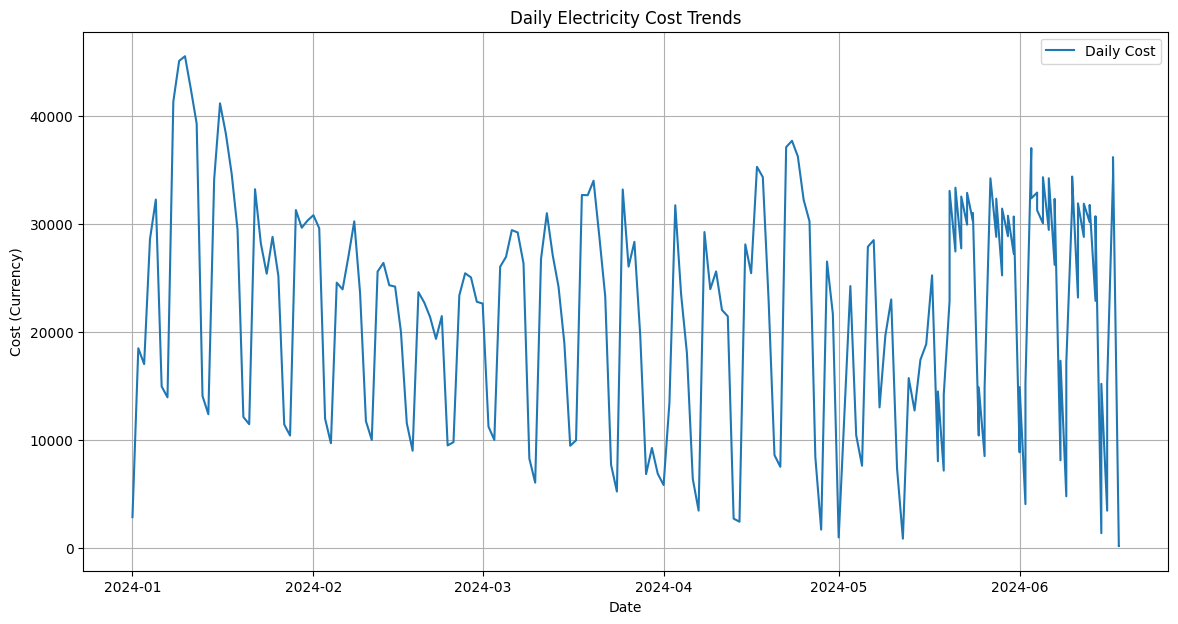

In [12]:
# Visualize the daily cost trends
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(merged_data_corrected.index, merged_data_corrected['Daily_Cost'], label='Daily Cost')
plt.xlabel('Date')
plt.ylabel('Cost (Currency)')
plt.title('Daily Electricity Cost Trends')
plt.legend()
plt.grid(True)
plt.show()




In [23]:
import plotly.graph_objects as go

# Create a line plot
fig = go.Figure()

# Add the daily cost data
fig.add_trace(go.Scatter(x=merged_data_corrected.index, y=merged_data_corrected['Daily_Cost'], mode='lines', name='Daily Cost'))

# Add the average spot prices data
fig.add_trace(go.Scatter(x=energy_data.index, y=energy_data['Daily_Average_Price'], mode='lines', name='Average Spot Prices'))

# Set the layout
fig.update_layout(title='Daily Electricity Cost Trends', xaxis_title='Date', yaxis_title='Cost (Currency)')

# Display the plot
fig.show()
fig.write_html("daily_cost_trends.html")



In [18]:
# Round all results to two decimal places
merged_data_corrected = merged_data_corrected.round(2)

# Save the rounded dataframe to a new CSV file
rounded_output_file_path = 'Rounded_Corrected_Electricity_Consumption_and_Cost_Analysis.csv'
merged_data_corrected.to_csv(rounded_output_file_path)
import plotly.graph_objects as go

# Create a line plot
fig = go.Figure(data=go.Scatter(x=merged_data_corrected.index, y=merged_data_corrected['Daily_Cost'], mode='lines', name='Daily Cost'))

# Set the layout
fig.update_layout(title='Daily Electricity Cost Trends (Rounded)', xaxis_title='Date', yaxis_title='Cost (Currency)')

# Display the plot
fig.show()


Peak consumption periods

In [21]:
# Reset the index to work with interval times
consumption_data.reset_index(inplace=True)

# Extract the time part from the 'Interval_Start'
consumption_data['Time'] = consumption_data['Interval_Start'].dt.time

# Group by the time of day to calculate the average consumption for each 15-minute interval
average_consumption_by_time = consumption_data.groupby('Time')['Consumption_kWh'].mean()

# Sort the intervals by average consumption to identify peak periods
peak_consumption_periods = average_consumption_by_time.sort_values(ascending=False)

# Display the top 10 peak consumption periods
peak_consumption_periods.head(20)


Time
07:30:00    192.922059
07:45:00    191.030882
08:45:00    189.645588
07:15:00    187.927941
11:45:00    186.782353
12:00:00    186.408824
09:00:00    185.864706
12:45:00    185.470588
12:30:00    185.392647
11:30:00    183.622059
12:15:00    183.555882
13:00:00    183.329412
07:00:00    183.276471
08:00:00    182.891176
09:45:00    182.804412
10:45:00    181.850000
10:00:00    181.423529
08:30:00    181.305882
09:30:00    180.585294
11:00:00    180.554412
Name: Consumption_kWh, dtype: float64